##  Multiple Linear Regression Model
- Model Building and Evaluation

In [103]:
import numpy as np
import pandas as pd
from IPython.display import display

In [107]:
#Step 1-Load the data
df=pd.read_csv('data.csv')

features = df.iloc[:, 1:-1]
targets = df.iloc[:, -1]
#x=df.drop(columns='Serial No.')

display(df)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#### 1.Min Max Scaling

In [109]:
#Step 2:Scale the features(x)
scaled_features= (features-features.min())/(features.max()-features.min())
display(scaled_features)
scaled_x=df.iloc[:,1:-1]
x=scaled_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


#### 2.Splitting Data

In [111]:
#Train/Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #80% of the data goes into traing the linear mode.20% will be used to test.
print(x_train.shape) #Dimensions of 80% of the features
print(x_test.shape) #Dimensions of 20% of the featuress
print(y_train.shape) #Dimensions of 80% of the target
print(y_test.shape) #Dimensions of 20% of the target

(400, 7)
(100, 7)
(400,)
(100,)


#### 3.Train data and Display Parameters

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
coeff=pd.DataFrame(lr.coef_,x.columns, columns = ['Coeffiencts'])
coeff.sort_values(by=['Coeffiencts'], ascending=False)
i=lr.intercept_
display(coeff)
print('Intercept:',i)

,Coeffiencts
GRE Score,0.002434
TOEFL Score,0.002996
University Rating,0.002569
SOP,0.001814
LOR,0.017238
CGPA,0.112527
Research,0.024027


Intercept: -1.4214470719016479


## Regression Plots

<function matplotlib.pyplot.show(close=None, block=None)>

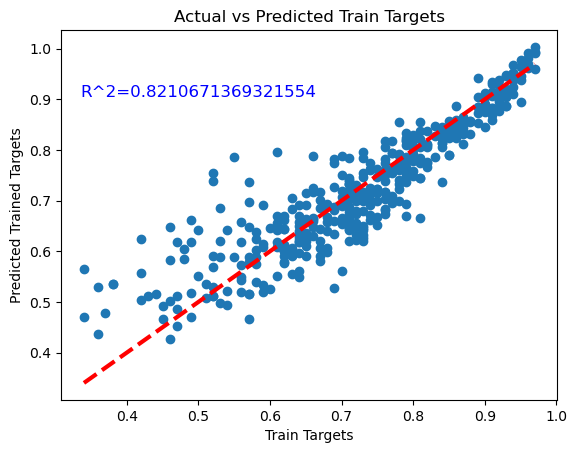

In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
pred_train=lr.predict(x_train)
plt.scatter(y_train,pred_train)
plt.xlabel('Train Targets')
plt.ylabel('Predicted Trained Targets')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],linestyle='--',color='r', linewidth=3)
r2_1=r2_score(y_train,pred_train)
plt.title('Actual vs Predicted Train Targets')
plt.text(0.5,0.9, 'R^2=0.8210671369321554', fontsize=12, color='b', ha='center', va='bottom')
plt.show



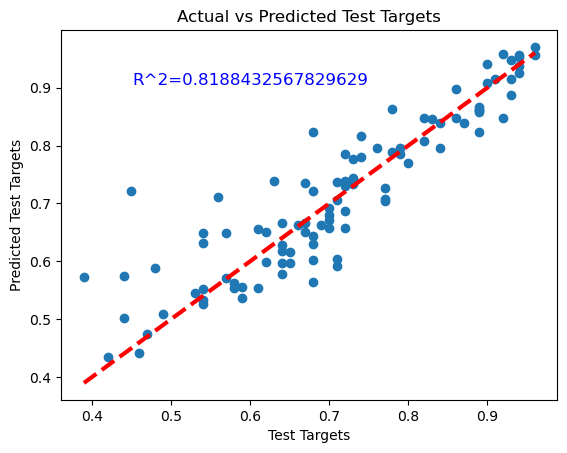

In [200]:
## import matplotlib.pyplot as plt
pred_test=lr.predict(x_test)
plt.scatter(y_test,pred_targets)
plt.xlabel("Test Targets")
plt.ylabel("Predicted Test Targets")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle='--',color='r', linewidth=3)
plt.title('Actual vs Predicted Test Targets')
plt.text(0.6,0.9, 'R^2=0.8188432567829629', fontsize=12, color='b', ha='center', va='bottom')
plt.show

r2_2=r2_score(actual_targets,pred_targets)